In [27]:
import pickle
import pandas as pd
import os
import re
import itertools

In [3]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

In [98]:
summary_dict = {}
with open('data/exp1/exp1_summary.pkl', 'rb') as f:
    summary_dict = pickle.load(f)
    
config = summary_dict['config']

In [99]:
summary_dict

{'config': {'gamma': 0.99,
  'hidden_dims': (128,),
  'lr': 0.001,
  'optimizer': 'Adam',
  'out_dir': 'data/exp1'},
 'id': 1,
 'num_seeds': 2,
 'space': {'hidden_dims': [(32,), (64,), (128,)]}}

In [100]:
out_dir = config['out_dir']

In [101]:
space = summary_dict['space']
num_seeds = summary_dict['num_seeds']

In [102]:
stats_df_list = []
name_list = [x[0] for x in space.items()]
vals_list = [x[1] for x in space.items()]
for val_list in itertools.product(*vals_list):
    pattern = ''
    for name, val in zip(name_list, val_list):
        name = re.sub(r'\(', '\(', '{}'.format(name))
        name = re.sub(r'\)', '\)', '{}'.format(name))
        val = re.sub(r'\(', '\(', '{}'.format(val))
        val = re.sub(r'\)', '\)', '{}'.format(val))
        pattern += '-{}={}'.format(name, val)
    for task_seed in range(num_seeds):
        fname = filter(lambda s: re.search(r'{}-task_seed={}-all-stats'.format(pattern, task_seed), s), os.listdir(out_dir))[0]
        with open(os.path.join(out_dir, fname), 'rb') as f:
            stats = pickle.load(f)
            temp_df = pd.DataFrame(stats)
            temp_df['task_seed'] = task_seed
            temp_df['episode'] = range(temp_df.shape[0]) 
            for name, val in zip(name_list, val_list):
                temp_df['{}'.format(name)] = '{}'.format(val)
            stats_df_list.append(temp_df)
stats_df = pd.concat(stats_df_list, axis=0)

In [103]:
pd.concat([stats_df.groupby(name_list + ['task_seed'])['reward'].mean(),
                stats_df.groupby(name_list + ['task_seed'])['steps_done'].mean(),
                stats_df.groupby(name_list + ['task_seed'])['episode'].max()], axis=1)\
    .rename(columns={'reward': 'avg_reward', 'steps_done': 'avg_steps', 'episode': 'episodes'})

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>avg_reward</th>
      <th>avg_steps</th>
      <th>episodes</th>
    </tr>
    <tr>
      <th>hidden_dims</th>
      <th>task_seed</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">(128,)</th>
      <th>0</th>
      <td>161.186574</td>
      <td>161.186574</td>
      <td>1146</td>
    </tr>
    <tr>
      <th>1</th>
      <td>141.343681</td>
      <td>141.343681</td>
      <td>901</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">(32,)</th>
      <th>0</th>
      <td>142.812247</td>
      <td>142.812247</td>
      <td>1730</td>
    </tr>
    <tr>
      <th>1</th>
      <td>144.799281</td>
      <td>144.799281</td>
      <td>1668</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">(64,)</th>
      <th>0</th>
      <td>135.838162</td>
      <td>135.838162</td>
      <td>1000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>151.163789</td>
      <td>151.163789</td>
      <td>1910</td>
    </tr>
  </tbody>
</table>
</div>

In [44]:
'{}-task_seed={}-all-stats'.format(pattern, task_seed) == '-hidden_dims=(32,)-double_q=False-task_seed=0-all_stats'

False

In [12]:
name = 'hidden_dim'
val_list = [32, 64, 128]
num_seeds = 2

In [17]:
stats_df_list = []
for val in val_list:
    for seed in range(num_seeds):
        fname = filter(lambda s: re.search(r'{}\S+seed{}\S+all-stats'.format(val, seed), s), os.listdir(log_dir))[0]
        with open(os.path.join(log_dir, fname), 'rb') as f:
            stats = pickle.load(f)
            temp_df = pd.DataFrame(stats)
            temp_df[name] = val
            temp_df['seed'] = seed
            temp_df['episode'] = range(temp_df.shape[0]) 
            stats_df_list.append(temp_df)
stats_df = pd.concat(stats_df_list, axis=0)

In [25]:
pd.concat([stats_df.groupby([name, 'seed'])['reward'].mean(),
                stats_df.groupby([name, 'seed'])['steps_done'].mean(),
                stats_df.groupby([name, 'seed'])['episode'].max()], axis=1)\
    .rename(columns={'reward': 'avg_reward', 'steps_done': 'avg_steps', 'episode': 'episodes'})

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>avg_reward</th>
      <th>avg_steps</th>
      <th>episodes</th>
    </tr>
    <tr>
      <th>hidden_dim</th>
      <th>seed</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">32</th>
      <th>0</th>
      <td>140.556840</td>
      <td>140.556840</td>
      <td>1556</td>
    </tr>
    <tr>
      <th>1</th>
      <td>129.744186</td>
      <td>129.744186</td>
      <td>1633</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">64</th>
      <th>0</th>
      <td>146.647887</td>
      <td>146.647887</td>
      <td>1206</td>
    </tr>
    <tr>
      <th>1</th>
      <td>132.804695</td>
      <td>132.804695</td>
      <td>1064</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">128</th>
      <th>0</th>
      <td>148.294340</td>
      <td>148.294340</td>
      <td>1059</td>
    </tr>
    <tr>
      <th>1</th>
      <td>147.780347</td>
      <td>147.780347</td>
      <td>864</td>
    </tr>
  </tbody>
</table>
</div>

In [14]:
stats_df.groupby(['hidden_dim', 'seed'])['steps_done'].mean()

hidden_dim  seed
32          0       140.556840
            1       129.744186
64          0       146.647887
            1       132.804695
128         0       148.294340
            1       147.780347
Name: steps_done, dtype: float64

hidden_dim  seed
32          0       1556
            1       1633
64          0       1206
            1       1064
128         0       1059
            1        864
Name: episode, dtype: int64

In [20]:
type(stats_df.groupby(['hidden_dim', 'seed'])['steps_done'].mean())

pandas.core.series.Series

In [18]:
stats_df.tail()

,reward,steps_done,hidden_dim,seed,episode
860,200.0,200,128,1,860
861,200.0,200,128,1,861
862,197.0,197,128,1,862
863,200.0,200,128,1,863
864,200.0,200,128,1,864


In [16]:
re.search(r'64\S+all-stats', 'REINFORCEAgent-exp0-hidden_dims=(64,)-seed0-all-stats-CartPole-v0.pkl')

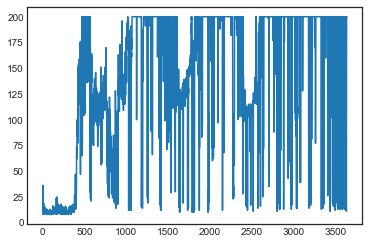

In [19]:
plt.plot(range(len(stats['reward'])), stats['reward'])

In [1]:
stats_dict = {}

In [5]:
with open('data/DQNAgent-baseline-online-stats-CartPole-v0.pkl', 'rb') as f:
    stats_dict['DQN'] = pickle.load(f)

In [6]:
with open('data/REINFORCEAgent-baseline-all-stats-CartPole-v0.pkl', 'rb') as f:
    stats_dict['REINFORCE'] = pickle.load(f)

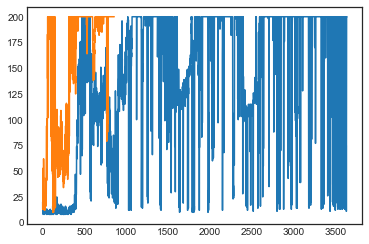

In [7]:
for name, stats in stats_dict.items():
    plt.plot(range(len(stats['reward'])), stats['reward'])

In [ ]:
plt.plot(range(len(stats_dict['DQN']['reward'])), stats_dict[['reward'])